This notebook reproduces the video-recall event correlation matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd
from scipy.spatial.distance import cdist

## Load data

In [2]:
video_events = np.load('../../../data/processed/video_events.npy')
recall_events = np.load('../../../data/processed/recall_events.npy')

## Compute correlation matrices

In [3]:
movie_recall_corrmats = [1 - cdist(video_events, r, 'correlation') for r in recall_events]

## Plot figure

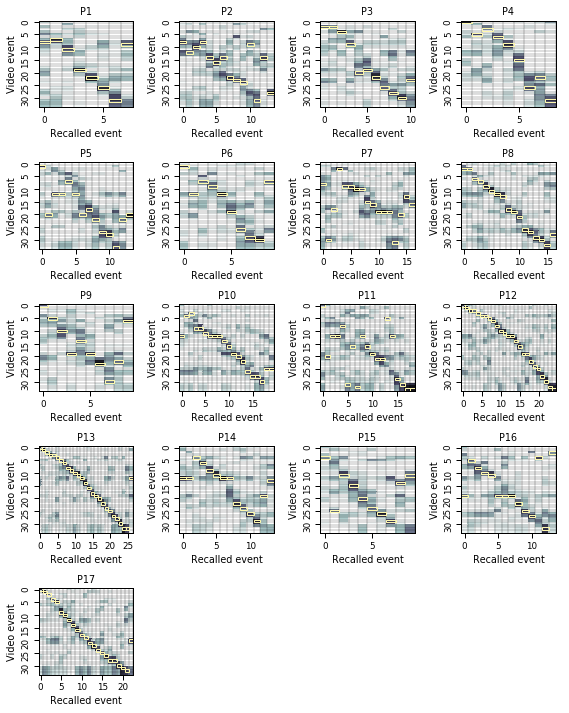

In [4]:
sns.set_context('paper')
fig, axarr = plt.subplots(5, 4)
axarr = axarr.flatten()
fig.set_size_inches(8, 10)
cmap = plt.cm.bone_r
mpl.rcParams['pdf.fonttype'] = 42

# video model
for i, (c, ax) in enumerate(zip(movie_recall_corrmats, axarr)):
    data = pd.DataFrame(c)
    a = sns.heatmap(data, 
                     cmap=cmap, xticklabels=5, yticklabels=5, 
                     vmin=0, vmax=1, ax=ax, cbar=False)
    a.set_ylabel('Video event')
    a.set_xlabel('Recalled event')
    a.set_title('P%s' % str(i+1))
    
    for _, spine in a.spines.items():
        spine.set_visible(True)
        
    a.hlines(list(range(video_events.shape[0])), *a.get_xlim(), linewidth=.25)
    a.vlines(list(range(video_events.shape[0])), *a.get_ylim(), linewidth=.25)
        
    bounds = np.argmax(c, axis=0)
    for j in range(len(bounds)):
        rect = patches.Rectangle((j,bounds[j]), 1, 1, linewidth=1, edgecolor='#FFF9AE',facecolor='none', zorder=2)
        a.add_patch(rect)
        
axarr[17].axis('off')
axarr[18].axis('off')
axarr[19].axis('off')
plt.tight_layout()
# plt.savefig('../../../paper/figs/matchmats.pdf')
plt.show()